In [654]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#### 1. Load Data

In [655]:
# load data
df = pd.read_csv('../../data/H2.csv')

#### 2. Pre-Prepare the Data

In [656]:
# Handle missing values
df["Children"].fillna(0, inplace=True)  # Fill missing 'Children' with 0
df["Country"].fillna("Unknown", inplace=True)  # Fill missing 'Country' with 'Unknown'

# Drop rows where adults, babies and children are zero at the same time
df = df[(df["Adults"] != 0) | (df["Babies"] != 0) | (df["Children"] != 0)]

# Check for missing values
missing_values = df.isnull().sum().any()
missing_values

np.False_

In [657]:
# Drop Duplicate rows
print(f"Total Number of Rows: {len(df)}")
print(f"Total Number of Rows without Duplicates: {len(df.drop_duplicates())}")

df = df.drop_duplicates()

Total Number of Rows: 79163
Total Number of Rows without Duplicates: 53274


`ADR` feature will be the target variable

In [658]:
# ADR (Average Daily Rate) is a continuous variable and we can use the describe method to get the summary statistics
adr_stats = df["ADR"].describe()
adr_stats

count    53274.000000
mean       111.271969
std         47.801588
min          0.000000
25%         84.150000
50%        105.300000
75%        134.100000
max       5400.000000
Name: ADR, dtype: float64

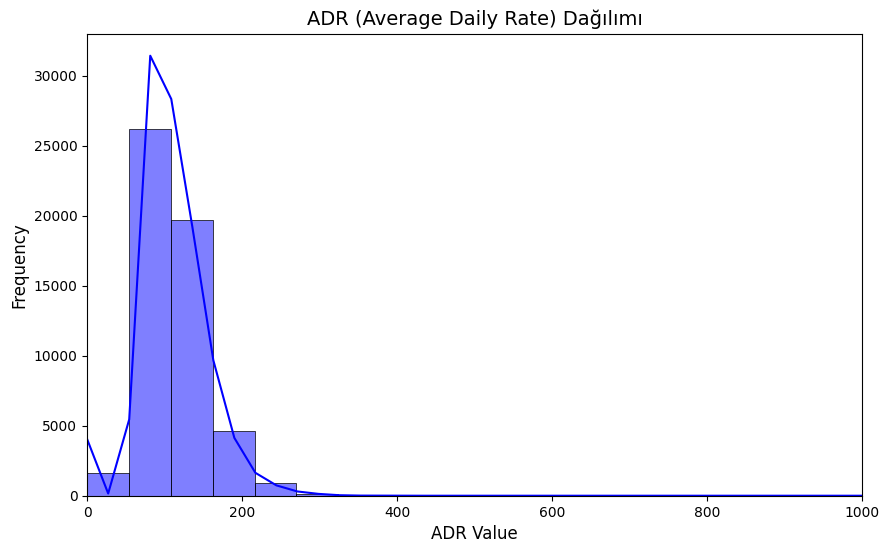

In [659]:
# Visualize the distribution of ADR
plt.figure(figsize=(10, 6))
sns.histplot(df['ADR'], bins=100, kde=True, color='blue')
plt.title('ADR (Average Daily Rate) Dağılımı', fontsize=14)
plt.xlabel('ADR Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 1000)  # Limit the x-axis to 1000
plt.show()

After 1000 is rare, probably we can assume as outlier values

In [660]:
# Let's determine the boundaries of outliers with the IQR (Interquartile Range) method.
Q1 = df["ADR"].quantile(0.25)
Q3 = df["ADR"].quantile(0.75)
IQR = Q3 - Q1

# Let's calculate the lower and upper limits (1.5 * IQR rule).
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Let's check the number of outliers.
outliers = df[(df["ADR"] < lower_bound) | (df["ADR"] > upper_bound)]
outlier_count = outliers.shape[0]

lower_bound, upper_bound, outlier_count

(np.float64(9.225000000000023), np.float64(209.02499999999998), 2369)

- Lower Bound: _9.23_
- Upper Bound: _209.02_
- Number of Outliers: _2,369_

Let's use the Winsorizing (Limitation) method to lower and upper limits the ADR values.
- Values ​​above the upper limit are equal to _209.02_, and values ​​below the lower limit are equal to _9.23_.

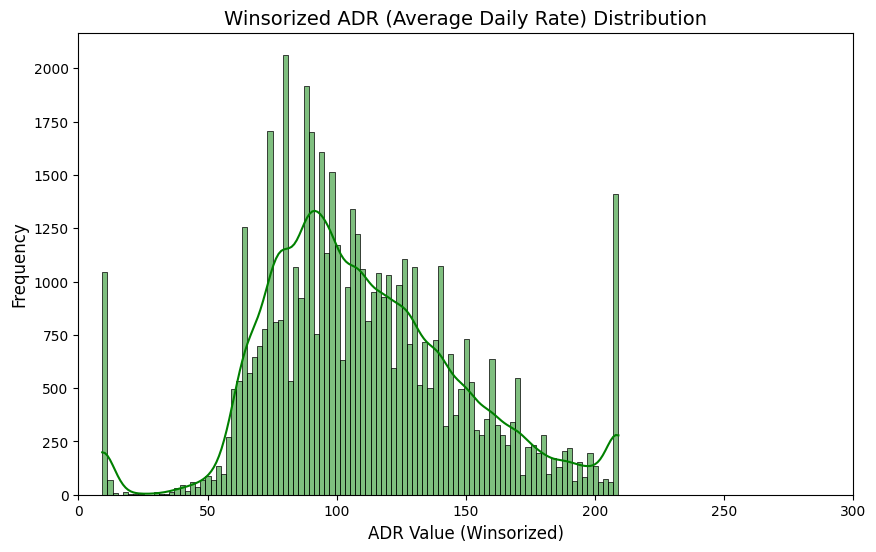

,Original ADR,Winsorized ADR
count,53274.000000,53274.000000
mean,111.271969,110.611881
std,47.801588,39.221441
min,0.000000,9.225000
25%,84.150000,84.150000
50%,105.300000,105.300000
75%,134.100000,134.100000
max,5400.000000,209.025000


In [661]:
# Let's limit the ADR values ​​according to the lower and upper limits (winsorizing).
df['ADR_winsorized'] = df['ADR'].clip(lower=lower_bound, upper=upper_bound)

# Visualize the distribution of winsorized ADR
plt.figure(figsize=(10, 6))
sns.histplot(df['ADR_winsorized'], bins=100, kde=True, color='green')
plt.title('Winsorized ADR (Average Daily Rate) Distribution', fontsize=14)
plt.xlabel('ADR Value (Winsorized)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 300)  # Limit the x-axis to 300
plt.show()

# Summary statistics of ADR and winsorized ADR
original_vs_winsorized = pd.DataFrame({
    "Original ADR": df['ADR'].describe(),
    "Winsorized ADR": df['ADR_winsorized'].describe()
})

original_vs_winsorized

In [662]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ADR_winsorized
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03,9.225
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01,76.500
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30,68.000
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23,76.500
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02,76.500


In [663]:
# Drop the original ADR column
df.drop('ADR', axis=1, inplace=True)

In [664]:
df.columns, df.shape

(Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
        'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
        'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
        'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
        'IsRepeatedGuest', 'PreviousCancellations',
        'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
        'BookingChanges', 'DepositType', 'Agent', 'Company',
        'DaysInWaitingList', 'CustomerType', 'RequiredCarParkingSpaces',
        'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
        'ADR_winsorized'],
       dtype='object'),
 (53274, 31))

#### 3. Edit Incorrectly Entered Data

In [665]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ADR_winsorized
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0,0,Check-Out,2015-07-03,9.225
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,0,1,Canceled,2015-07-01,76.500
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,0,1,Canceled,2015-04-30,68.000
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,0,2,Canceled,2015-06-23,76.500
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,0,1,Canceled,2015-04-02,76.500


In [666]:
def split_columns(df):
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    return categorical_columns, numerical_columns

In [667]:
# Let's check the data types of the columns.
categorical_columns, numerical_columns = split_columns(df)

In [668]:
# Remove leading and trailing spaces from all categorical columns, if any
for col in categorical_columns:
    df[col] = df[col].str.strip()

In [669]:
# Convert 'Children' column from float to int
df['Children'] = df['Children'].astype(int)

In [670]:
# Correct the wrong type in 'Agent' and 'Company' columns
# Replace 'NULL' values with 0
replace_null = lambda col: df[col].replace("NULL", 0)
# Convert the column to integer
convert_to_int = lambda col: df[col].astype(int)

# Correct the 'Agent' column
df["Agent"] = replace_null("Agent")
df["Agent"] = convert_to_int("Agent")

# Correct the 'Company' column
df["Company"] = replace_null("Company")
df["Company"] = convert_to_int("Company")

In [671]:
# Create Features from 'ReservationStatusDate' column
df['ReservationStatusDate'] = pd.to_datetime(df['ReservationStatusDate'])

df['ReservationStatus_Year'] = df['ReservationStatusDate'].dt.year
df['ReservationStatus_Month'] = df['ReservationStatusDate'].dt.month
df['ReservationStatus_Day'] = df['ReservationStatusDate'].dt.day

df.drop(['ReservationStatusDate'] , axis = 1, inplace = True)

In [672]:
# Remove rare categories
def remove_rare_categories(df, categorical_cols, min_count=10):
    """
    In categorical columns, it deletes categories that are below a certain threshold value.
        Args:
            df: Pandas DataFrame
            categorical_cols: List of categorical columns
            min_count: Minimum number of observations for a category to remain
    """

    for col in categorical_cols:
        value_counts = df[col].value_counts()
        common_categories = value_counts[value_counts >= min_count].index
        df = df[df[col].isin(common_categories)]
    return df


cat_col, _ = split_columns(df)

df = remove_rare_categories(df, cat_col, min_count=10)

In [673]:
# Drop the Country column
df.drop(columns=["Country"], inplace=True)

In [674]:
# Map the months to their corresponding numerical values
month_mapping = {
    'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5,
    'July': 6, 'August': 7, 'September': 8, 'October': 9, 'November': 10, 'December': 11
}

# Apply the mapping to the 'ArrivalDateMonth' column
df['ArrivalDateMonth'] = df['ArrivalDateMonth'].map(month_mapping)

In [675]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to be encoded
categorical_cols_to_encode = [
    'Meal', 'MarketSegment', 'DistributionChannel',
    'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'CustomerType', 'ReservationStatus'
]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store the mappings
label_mappings = {}

# For each categorical column, get the mapping of encoded values to original categories
for col in categorical_cols_to_encode:
    # Initialize a new LabelEncoder instance and fit it with the original data
    le = LabelEncoder()
    le.fit(df[col])
    # Transform the original data to get the encoded values
    encoded_values = le.transform(df[col])
    # Get the original categories using inverse_transform
    original_categories = le.inverse_transform(encoded_values)
    # Create a mapping dictionary for the column
    label_mappings[col] = dict(zip(encoded_values, original_categories))

# Encode each categorical column
for col in categorical_cols_to_encode:
    df[col] = label_encoder.fit_transform(df[col])
    
label_mappings

{'Meal': {np.int64(2): 'HB',
  np.int64(0): 'BB',
  np.int64(3): 'SC',
  np.int64(1): 'FB'},
 'MarketSegment': {np.int64(5): 'Offline TA/TO',
  np.int64(6): 'Online TA',
  np.int64(4): 'Groups',
  np.int64(1): 'Complementary',
  np.int64(3): 'Direct',
  np.int64(2): 'Corporate',
  np.int64(0): 'Aviation'},
 'DistributionChannel': {np.int64(3): 'TA/TO',
  np.int64(1): 'Direct',
  np.int64(0): 'Corporate',
  np.int64(2): 'GDS'},
 'ReservedRoomType': {np.int64(0): 'A',
  np.int64(1): 'B',
  np.int64(3): 'D',
  np.int64(5): 'F',
  np.int64(4): 'E',
  np.int64(6): 'G',
  np.int64(2): 'C'},
 'AssignedRoomType': {np.int64(0): 'A',
  np.int64(1): 'B',
  np.int64(5): 'F',
  np.int64(3): 'D',
  np.int64(6): 'G',
  np.int64(4): 'E',
  np.int64(7): 'K',
  np.int64(2): 'C'},
 'DepositType': {np.int64(0): 'No Deposit',
  np.int64(1): 'Non Refund',
  np.int64(2): 'Refundable'},
 'CustomerType': {np.int64(2): 'Transient',
  np.int64(3): 'Transient-Party',
  np.int64(0): 'Contract',
  np.int64(1): 'Gro

In [676]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ADR_winsorized,ReservationStatus_Year,ReservationStatus_Month,ReservationStatus_Day
0,0,6,2015,6,27,1,0,2,1,0,0,2,5,3,0,0,0,0,0,0,0,6,0,0,2,0,0,1,9.225,2015,7,3
1,1,88,2015,6,27,1,0,4,2,0,0,0,6,3,0,0,0,0,0,0,0,9,0,0,2,0,1,0,76.500,2015,7,1
2,1,65,2015,6,27,1,0,4,1,0,0,0,6,3,0,0,0,0,0,0,0,9,0,0,2,0,1,0,68.000,2015,4,30
3,1,92,2015,6,27,1,2,4,2,0,0,0,6,3,0,0,0,0,0,0,0,9,0,0,2,0,2,0,76.500,2015,6,23
4,1,100,2015,6,27,2,0,2,2,0,0,0,6,3,0,0,0,0,0,0,0,9,0,0,2,0,1,0,76.500,2015,4,2


In [677]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 53024 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   53024 non-null  int64  
 1   LeadTime                     53024 non-null  int64  
 2   ArrivalDateYear              53024 non-null  int64  
 3   ArrivalDateMonth             53024 non-null  int64  
 4   ArrivalDateWeekNumber        53024 non-null  int64  
 5   ArrivalDateDayOfMonth        53024 non-null  int64  
 6   StaysInWeekendNights         53024 non-null  int64  
 7   StaysInWeekNights            53024 non-null  int64  
 8   Adults                       53024 non-null  int64  
 9   Children                     53024 non-null  int64  
 10  Babies                       53024 non-null  int64  
 11  Meal                         53024 non-null  int64  
 12  MarketSegment                53024 non-null  int64  
 13  DistributionChannel  

(None, (53024, 32))

- Find Least Valuable Variables

In [678]:
_, num_cols = split_columns(df)

# Calculate the correlation matrix
correlation_matrix = df[num_cols].corr()

# Get the correlation of 'ADR_winsorized' with other variables
adr_correlation = correlation_matrix['ADR_winsorized'].abs().sort_values(ascending=False)
adr_correlation

ADR_winsorized                 1.000000
ReservedRoomType               0.524704
AssignedRoomType               0.424236
Adults                         0.346427
Children                       0.333949
ReservationStatus_Year         0.259197
ArrivalDateYear                0.246965
MarketSegment                  0.243902
IsRepeatedGuest                0.195392
TotalOfSpecialRequests         0.144908
PreviousBookingsNotCanceled    0.110078
DistributionChannel            0.107094
CustomerType                   0.103102
ReservationStatus              0.099306
IsCanceled                     0.094186
Company                        0.091123
PreviousCancellations          0.090449
Meal                           0.067643
Agent                          0.067336
ArrivalDateMonth               0.060667
DaysInWaitingList              0.057914
DepositType                    0.057222
ArrivalDateWeekNumber          0.055038
RequiredCarParkingSpaces       0.051711
StaysInWeekNights              0.034310


#### 4. Create New Features

In [679]:
# 1. TotalGuests
df['TotalGuests'] = df['Adults'] + df['Children'] + df['Babies']

# 2. StayDuration
df['StayDuration'] = df['StaysInWeekendNights'] + df['StaysInWeekNights']

# 3. DaysToArrival
df['DaysToArrival'] = df['LeadTime'] - df['DaysInWaitingList']

# 4. Season
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['ArrivalDateMonth'].apply(get_season)

# 5. Waiting Time Category (waiting_time_category)
df['waiting_time_category'] = pd.cut(
    df['LeadTime'], 
    bins=[-1, 7, 30, 90, 365, df['LeadTime'].max()], 
    labels=['Last Minute', 'Short Term', 'Medium Term', 'Long Term', 'Very Long Term']
)

# 6. Child Ratio
df['ChildRatio'] = df['Children'] / df['TotalGuests']
df['ChildRatio'] = df['ChildRatio'].fillna(0)

# 7. High Demand (high_demand)
high_demand_threshold = df['StayDuration'].quantile(0.75)
df['HighDemand'] = (df['StayDuration'] > high_demand_threshold).astype(int)

# 8. Booking Urgency (booking_urgency)
booking_urgency_threshold = df['LeadTime'].quantile(0.25)
df['BookingUrgency'] = (df['LeadTime'] < booking_urgency_threshold).astype(int)

# 9. Group Type (group_type)
def get_group_type(row):
    total_guests = row['TotalGuests']
    if total_guests == 1:
        return 'Solo'
    elif total_guests == 2:
        return 'Couple'
    elif total_guests <= 5:
        return 'Family'
    else:
        return 'Group'

df['group_type'] = df.apply(get_group_type, axis=1)


In [680]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ADR_winsorized,ReservationStatus_Year,ReservationStatus_Month,ReservationStatus_Day,TotalGuests,StayDuration,DaysToArrival,Season,waiting_time_category,ChildRatio,HighDemand,BookingUrgency,group_type
0,0,6,2015,6,27,1,0,2,1,0,0,2,5,3,0,0,0,0,0,0,0,6,0,0,2,0,0,1,9.225,2015,7,3,1,2,6,Fall,Last Minute,0.0,0,1,Solo
1,1,88,2015,6,27,1,0,4,2,0,0,0,6,3,0,0,0,0,0,0,0,9,0,0,2,0,1,0,76.500,2015,7,1,2,4,88,Fall,Medium Term,0.0,0,0,Couple
2,1,65,2015,6,27,1,0,4,1,0,0,0,6,3,0,0,0,0,0,0,0,9,0,0,2,0,1,0,68.000,2015,4,30,1,4,65,Fall,Medium Term,0.0,0,0,Solo
3,1,92,2015,6,27,1,2,4,2,0,0,0,6,3,0,0,0,0,0,0,0,9,0,0,2,0,2,0,76.500,2015,6,23,2,6,92,Fall,Long Term,0.0,1,0,Couple
4,1,100,2015,6,27,2,0,2,2,0,0,0,6,3,0,0,0,0,0,0,0,9,0,0,2,0,1,0,76.500,2015,4,2,2,2,100,Fall,Long Term,0.0,0,0,Couple


In [681]:
df.shape, df.columns

((53024, 41),
 Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
        'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
        'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
        'Babies', 'Meal', 'MarketSegment', 'DistributionChannel',
        'IsRepeatedGuest', 'PreviousCancellations',
        'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
        'BookingChanges', 'DepositType', 'Agent', 'Company',
        'DaysInWaitingList', 'CustomerType', 'RequiredCarParkingSpaces',
        'TotalOfSpecialRequests', 'ReservationStatus', 'ADR_winsorized',
        'ReservationStatus_Year', 'ReservationStatus_Month',
        'ReservationStatus_Day', 'TotalGuests', 'StayDuration', 'DaysToArrival',
        'Season', 'waiting_time_category', 'ChildRatio', 'HighDemand',
        'BookingUrgency', 'group_type'],
       dtype='object'))

In [682]:
cat_col, _ = split_columns(df)
cat_col

Index(['Season', 'waiting_time_category', 'group_type'], dtype='object')

In [683]:
# Let's Encode remaining categorical columns
# Map the Seasons to their corresponding numerical values
season_mapping = {"Winter": 0, "Spring": 1, "Summer": 2, "Fall": 3}

# Apply the mapping to the 'Season' column
df["Season"] = df["Season"].map(season_mapping)


# Map the Group Types to their corresponding numerical values
group_type_mapping = {"Solo": 0, "Couple": 1, "Family": 2, "Group": 3}

# Apply the mapping to the 'group_type' column
df["GroupType"] = df["group_type"].map(group_type_mapping)
# Drop the 'group_type' column
df.drop(columns=["group_type"], inplace=True)


# Map the waiting_time_category to their corresponding numerical values
waiting_time_category_mapping = {
    "Long Term": 0,
    "Medium Term": 1,
    "Short Term": 2,
    "Last Minute": 3,
    "Very Long Term": 4,
}

# Apply the mapping to the 'waiting_time_category' column
df["WaitingTimeCategory"] = df["waiting_time_category"].map(
    waiting_time_category_mapping
)
# Convert WaitingTimeCategory to int
df["WaitingTimeCategory"] = convert_to_int("WaitingTimeCategory")
# Drop the 'waiting_time_category' column
df.drop(columns=["waiting_time_category"], inplace=True)

In [684]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ADR_winsorized,ReservationStatus_Year,ReservationStatus_Month,ReservationStatus_Day,TotalGuests,StayDuration,DaysToArrival,Season,ChildRatio,HighDemand,BookingUrgency,GroupType,WaitingTimeCategory
0,0,6,2015,6,27,1,0,2,1,0,0,2,5,3,0,0,0,0,0,0,0,6,0,0,2,0,0,1,9.225,2015,7,3,1,2,6,3,0.0,0,1,0,3
1,1,88,2015,6,27,1,0,4,2,0,0,0,6,3,0,0,0,0,0,0,0,9,0,0,2,0,1,0,76.500,2015,7,1,2,4,88,3,0.0,0,0,1,1
2,1,65,2015,6,27,1,0,4,1,0,0,0,6,3,0,0,0,0,0,0,0,9,0,0,2,0,1,0,68.000,2015,4,30,1,4,65,3,0.0,0,0,0,1
3,1,92,2015,6,27,1,2,4,2,0,0,0,6,3,0,0,0,0,0,0,0,9,0,0,2,0,2,0,76.500,2015,6,23,2,6,92,3,0.0,1,0,1,0
4,1,100,2015,6,27,2,0,2,2,0,0,0,6,3,0,0,0,0,0,0,0,9,0,0,2,0,1,0,76.500,2015,4,2,2,2,100,3,0.0,0,0,1,0


- Find Least Valuable Variables

In [685]:
_, num_cols = split_columns(df)

# Calculate the correlation matrix
correlation_matrix = df[num_cols].corr()

# Get the correlation of 'ADR_winsorized' with other variables
adr_correlation = correlation_matrix['ADR_winsorized'].abs().sort_values(ascending=False)
adr_correlation

ADR_winsorized                 1.000000
ReservedRoomType               0.524704
TotalGuests                    0.479568
GroupType                      0.437702
AssignedRoomType               0.424236
Adults                         0.346427
Children                       0.333949
ChildRatio                     0.279234
ReservationStatus_Year         0.259197
ArrivalDateYear                0.246965
MarketSegment                  0.243902
IsRepeatedGuest                0.195392
TotalOfSpecialRequests         0.144908
PreviousBookingsNotCanceled    0.110078
DistributionChannel            0.107094
CustomerType                   0.103102
ReservationStatus              0.099306
IsCanceled                     0.094186
Company                        0.091123
PreviousCancellations          0.090449
Meal                           0.067643
Agent                          0.067336
ArrivalDateMonth               0.060667
BookingUrgency                 0.058164
DaysInWaitingList              0.057914


In [686]:
# Remove columns with correlation less than 0.05 with 'ADR_winsorized'
low_corr_columns = adr_correlation[adr_correlation < 0.05].index
df.drop(columns=low_corr_columns, inplace=True)

df.shape, df.columns

((53024, 29),
 Index(['IsCanceled', 'ArrivalDateYear', 'ArrivalDateMonth',
        'ArrivalDateWeekNumber', 'Adults', 'Children', 'Meal', 'MarketSegment',
        'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
        'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
        'DepositType', 'Agent', 'Company', 'DaysInWaitingList', 'CustomerType',
        'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
        'ReservationStatus', 'ADR_winsorized', 'ReservationStatus_Year',
        'TotalGuests', 'Season', 'ChildRatio', 'BookingUrgency', 'GroupType'],
       dtype='object'))

#### 5. Scale the Data

In [687]:
from sklearn.preprocessing import StandardScaler

cat_cols, num_cols = split_columns(df)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,IsCanceled,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,Adults,Children,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,DepositType,Agent,Company,DaysInWaitingList,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ADR_winsorized,ReservationStatus_Year,TotalGuests,Season,ChildRatio,BookingUrgency,GroupType
0,-0.655677,-1.901475,0.184706,0.026385,-1.647771,-0.298431,1.164551,-0.163605,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.322088,-0.176538,-0.085757,-0.144351,-0.191577,-0.853955,0.572963,-2.585778,-1.878292,-1.468134,0.0,-0.299366,1.741950,-1.628428
1,1.525142,-1.901475,0.184706,0.026385,0.220097,-0.298431,-0.534188,0.601385,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.254957,-0.176538,-0.085757,-0.144351,-0.191577,0.345550,-1.528931,-0.869873,-1.878292,-0.030953,0.0,-0.299366,-0.574069,0.027260
2,1.525142,-1.901475,0.184706,0.026385,-1.647771,-0.298431,-0.534188,0.601385,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.254957,-0.176538,-0.085757,-0.144351,-0.191577,0.345550,-1.528931,-1.086673,-1.878292,-1.468134,0.0,-0.299366,-0.574069,-1.628428
3,1.525142,-1.901475,0.184706,0.026385,0.220097,-0.298431,-0.534188,0.601385,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.254957,-0.176538,-0.085757,-0.144351,-0.191577,1.545055,-1.528931,-0.869873,-1.878292,-0.030953,0.0,-0.299366,-0.574069,0.027260
4,1.525142,-1.901475,0.184706,0.026385,0.220097,-0.298431,-0.534188,0.601385,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.254957,-0.176538,-0.085757,-0.144351,-0.191577,0.345550,-1.528931,-0.869873,-1.878292,-0.030953,0.0,-0.299366,-0.574069,0.027260


#### 6. Add Customer Segmentation To the Data

- Find Optimal K

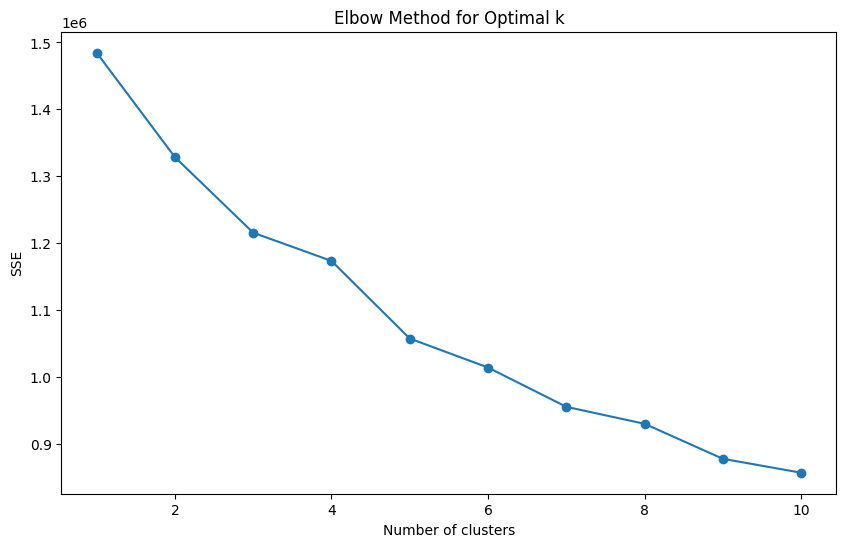

In [688]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

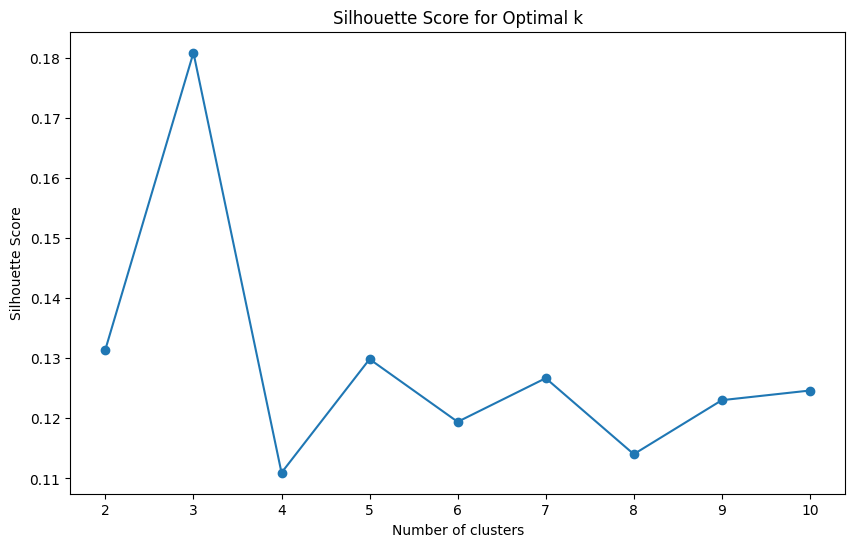

In [689]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [690]:
# KMeans with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
y_pred = kmeans.fit_predict(df)

# Add cluster labels to the original dataframe
df['Cluster'] = y_pred

df.head()

,IsCanceled,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,Adults,Children,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,DepositType,Agent,Company,DaysInWaitingList,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ADR_winsorized,ReservationStatus_Year,TotalGuests,Season,ChildRatio,BookingUrgency,GroupType,Cluster
0,-0.655677,-1.901475,0.184706,0.026385,-1.647771,-0.298431,1.164551,-0.163605,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.322088,-0.176538,-0.085757,-0.144351,-0.191577,-0.853955,0.572963,-2.585778,-1.878292,-1.468134,0.0,-0.299366,1.741950,-1.628428,3
1,1.525142,-1.901475,0.184706,0.026385,0.220097,-0.298431,-0.534188,0.601385,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.254957,-0.176538,-0.085757,-0.144351,-0.191577,0.345550,-1.528931,-0.869873,-1.878292,-0.030953,0.0,-0.299366,-0.574069,0.027260,2
2,1.525142,-1.901475,0.184706,0.026385,-1.647771,-0.298431,-0.534188,0.601385,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.254957,-0.176538,-0.085757,-0.144351,-0.191577,0.345550,-1.528931,-1.086673,-1.878292,-1.468134,0.0,-0.299366,-0.574069,-1.628428,2
3,1.525142,-1.901475,0.184706,0.026385,0.220097,-0.298431,-0.534188,0.601385,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.254957,-0.176538,-0.085757,-0.144351,-0.191577,1.545055,-1.528931,-0.869873,-1.878292,-0.030953,0.0,-0.299366,-0.574069,0.027260,2
4,1.525142,-1.901475,0.184706,0.026385,0.220097,-0.298431,-0.534188,0.601385,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.254957,-0.176538,-0.085757,-0.144351,-0.191577,0.345550,-1.528931,-0.869873,-1.878292,-0.030953,0.0,-0.299366,-0.574069,0.027260,2


In [691]:
df['Cluster'].value_counts()

Cluster
4    13466
2    10493
3    10297
5     6939
0     5473
6     4812
1     1544
Name: count, dtype: int64

**cluster_names:**
- `0`: **Budget Travelers**,
- `1`: **Business Travelers**,
- `2`: **Family Vacationers**,
- `3`: **Solo Travelers**,
- `4`: **Luxury Seekers**,
- `5`: **Group Travelers**,
- `6`: **Last Minute Bookers**

In [693]:
# Standardize the Cluster column
df['Cluster'] = scaler.fit_transform(df[['Cluster']])

df.head()

,IsCanceled,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,Adults,Children,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,DepositType,Agent,Company,DaysInWaitingList,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ADR_winsorized,ReservationStatus_Year,TotalGuests,Season,ChildRatio,BookingUrgency,GroupType,Cluster
0,-0.655677,-1.901475,0.184706,0.026385,-1.647771,-0.298431,1.164551,-0.163605,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.322088,-0.176538,-0.085757,-0.144351,-0.191577,-0.853955,0.572963,-2.585778,-1.878292,-1.468134,0.0,-0.299366,1.741950,-1.628428,-0.133050
1,1.525142,-1.901475,0.184706,0.026385,0.220097,-0.298431,-0.534188,0.601385,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.254957,-0.176538,-0.085757,-0.144351,-0.191577,0.345550,-1.528931,-0.869873,-1.878292,-0.030953,0.0,-0.299366,-0.574069,0.027260,-0.731933
2,1.525142,-1.901475,0.184706,0.026385,-1.647771,-0.298431,-0.534188,0.601385,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.254957,-0.176538,-0.085757,-0.144351,-0.191577,0.345550,-1.528931,-1.086673,-1.878292,-1.468134,0.0,-0.299366,-0.574069,-1.628428,-0.731933
3,1.525142,-1.901475,0.184706,0.026385,0.220097,-0.298431,-0.534188,0.601385,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.254957,-0.176538,-0.085757,-0.144351,-0.191577,1.545055,-1.528931,-0.869873,-1.878292,-0.030953,0.0,-0.299366,-0.574069,0.027260,-0.731933
4,1.525142,-1.901475,0.184706,0.026385,0.220097,-0.298431,-0.534188,0.601385,0.433983,-0.179605,-0.096076,-0.094086,-0.600876,-0.71002,-0.12717,-0.254957,-0.176538,-0.085757,-0.144351,-0.191577,0.345550,-1.528931,-0.869873,-1.878292,-0.030953,0.0,-0.299366,-0.574069,0.027260,-0.731933
